In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from general_utils import utils
import pickle as pkl
import numpy as np
import importlib
import project_utils.PatientBootstrap as PBS
import os

utils.default_plot_format()

utils.pd_display_settings(3)


In [ ]:
data_path = "processed_data\outliers_10min_Nabian_2025_02_27.pkl"

In [3]:


pickled = pd.read_pickle(data_path)
data = pickled["data"]
indicator_columns = pickled["indicator_columns"]
time_metrics = pickled["time_metrics"]
frequency_metrics = pickled["frequency_metrics"]
non_linear_metrics = pickled["non_linear_metrics"]

data.head()

,t_start,t_end,SDRR,RMSSD,pNN50 (%),Mean HR (bpm),ULF Power,ULF Peak Frequency,VLF Power,VLF Peak Frequency,...,UCr (g),UACR (mg÷g),Complications,Nephropathy,Retinopathy and cataract,DPN,Heart Disease,atherosclerosis or stenosis,Carotid Plaque,Condition
0,0.76,300.65,60.93,61.35,4.42,81.42,0,0,3.71,0.0267,...,NaN,NaN,0,0,0,False,0,0,0,Diabetes
1,301.46,601.06,58.91,36.23,3.90,82.09,0,0,1.84,0.03,...,NaN,NaN,0,0,0,False,0,0,0,Diabetes
2,601.74,901.43,91.85,71.25,12.10,74.51,0,0,7.00,0.0234,...,NaN,NaN,0,0,0,False,0,0,0,Diabetes
3,902.18,1202,93.23,90.24,13.39,73.35,0,0,2.37,0.02,...,NaN,NaN,0,0,0,False,0,0,0,Diabetes
4,1202,1502,51.21,33.28,10.95,69.57,0,0,4.53,0.0368,...,NaN,NaN,0,0,0,False,0,0,0,Diabetes


In [4]:
print("time_metrics =", time_metrics)
print("frequency_metrics =", frequency_metrics)
print("non_linear_metrics =", non_linear_metrics)

time_metrics = ['SDRR', 'RMSSD', 'pNN50 (%)', 'Mean HR (bpm)']
frequency_metrics = ['VLF Power', 'LF Power', 'HF Power', 'LF÷HF Ratio']
non_linear_metrics = ['S', 'SD1', 'SD2', 'SD1÷SD2', 'ApEn', 'SampEn', 'DFA α1', 'DFA α2', 'D2']


# Resample mean for each condition repeatedly


In [5]:
control_id = data[~data['DPN']].id.unique()
dpn_id = data[data['DPN']].id.unique()

print(control_id, dpn_id)

['19070921' '19072205' '19072214' '19072938' '19072939' '19072940'
 '19080106' '19081506' '19082406' '19090308' '19090320' '19102102'
 '19102524' '19112609' '19121303' '19121735' '20050628' '20052606'
 '20061729' '20120922' '20121033' '20121718'] ['19101619' '20010826' '20101822' '20123017']


In [6]:
sampler = PBS.PatientBootstrap(data, n = 100000)

for metric in indicator_columns:
    sampler.sample_dpn_control(metric, dpn_id=dpn_id, control_id=control_id)

bayes_table = sampler.evaluate_bayes_metrics()

display(bayes_table.sort_values('Bayes_p', ascending=True))

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,D2,0.00852,-3.95,0.66,-2.57,0.16
0,pNN50 (%),0.018,3.70,2.87,12.83,2.73
0,Mean HR (bpm),0.0371,84.37,4.89,74.92,1.97
0,SD2,0.0552,55.93,18.80,92.43,9.75
0,SDRR,0.0573,45.32,15.92,75.82,8.31
0,SD1,0.0784,28.83,13.24,51.16,7.23
0,RMSSD,0.0793,40.75,18.76,72.35,10.18
0,DFA α2,0.12,1.03,0.11,0.88,0.0446
0,S,0.13,10153,8672,23073,6475
0,VLF Power,0.14,2.46,4.03,4.91,1.69


## Bootstrapped Metric Distributions
### Bootstrapped Time Metrics

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,SDRR,0.0573,45.32,15.92,75.82,8.31


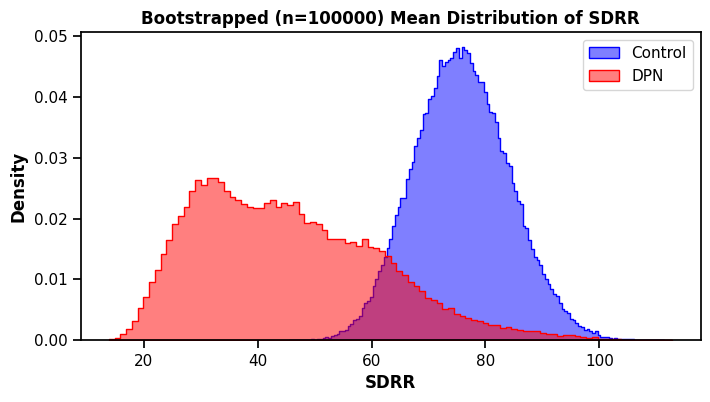

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,RMSSD,0.0793,40.75,18.76,72.35,10.18


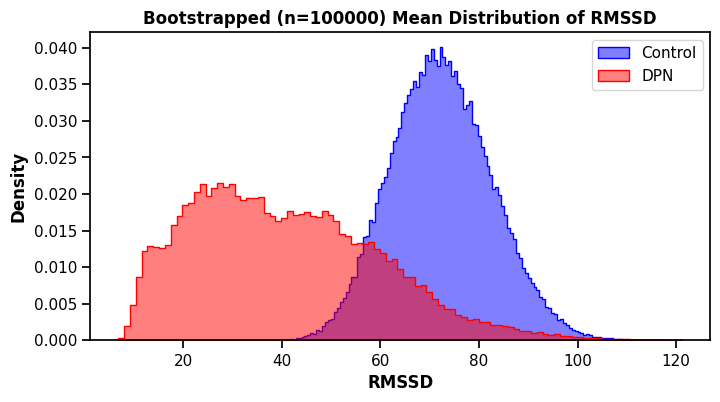

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,pNN50 (%),0.018,3.70,2.87,12.83,2.73


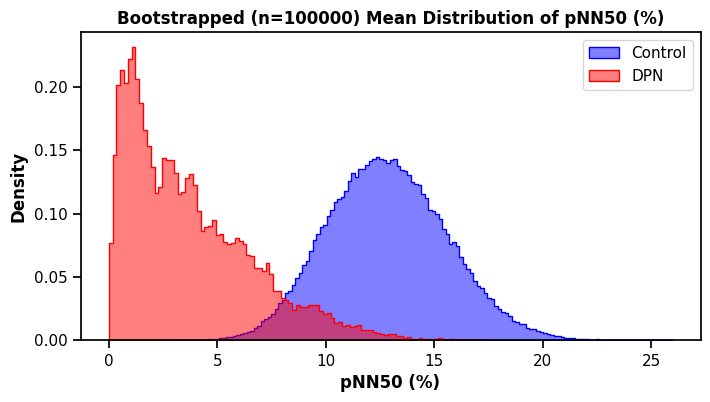

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,Mean HR (bpm),0.0371,84.37,4.89,74.92,1.97


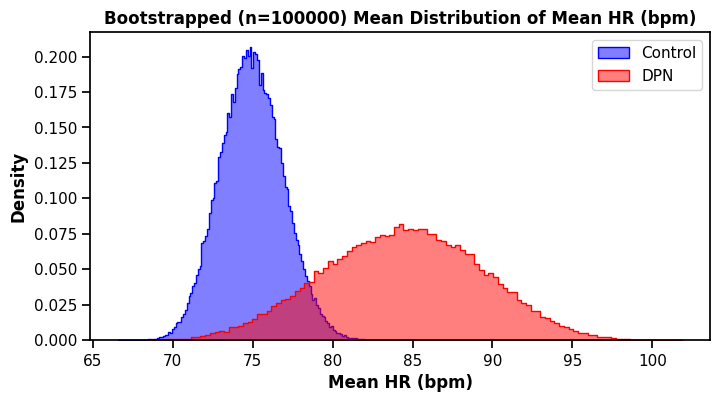

In [7]:
sampler.show_bayes_metrics(time_metrics)

### Bootstrapped Frequency Metrics

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,VLF Power,0.14,2.46,4.03,4.91,1.69


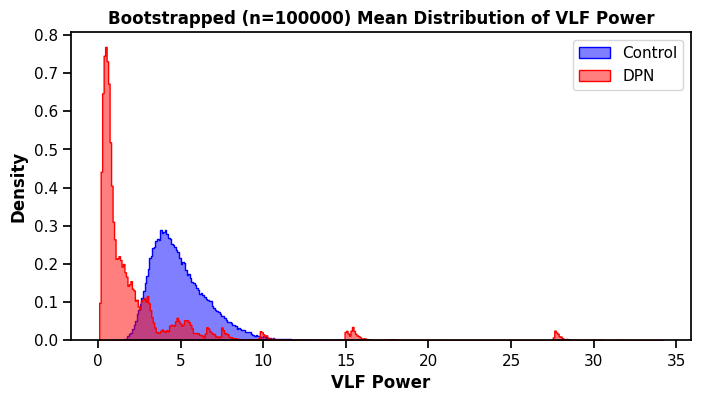

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,LF Power,0.21,54.83,63.77,98.73,31.63


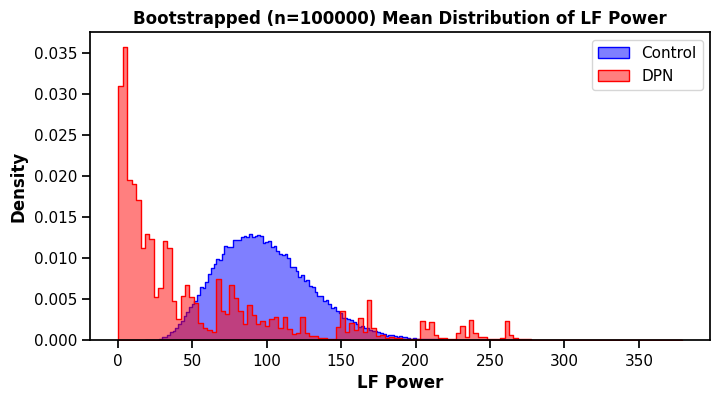

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,HF Power,0.17,693.05,764.02,1542,518.95


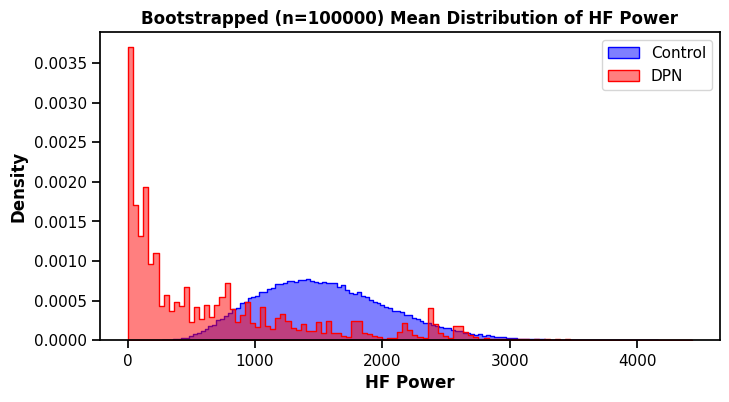

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,LF÷HF Ratio,0.44,0.14,0.0569,0.14,0.0302


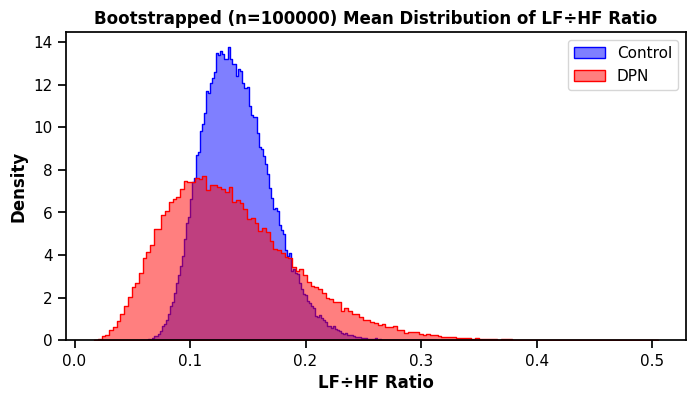

In [8]:
sampler.show_bayes_metrics(frequency_metrics)

There are significant issues with LF HF frequency calculation, as indicated by discontinuous means. 

### Bootstrapped Non Linear Metrics

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,S,0.13,10153,8672,23073,6475


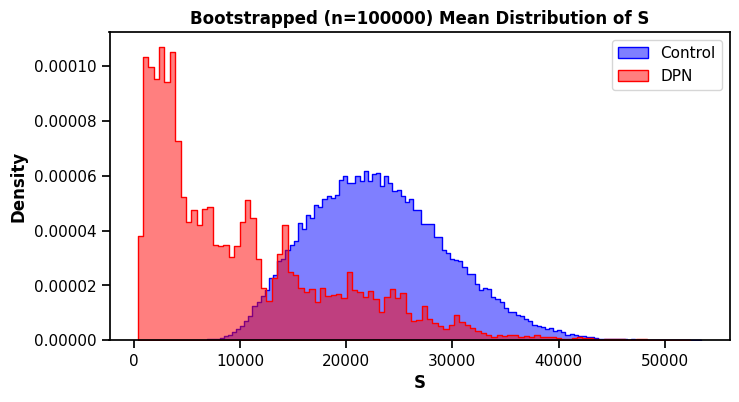

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,SD1,0.0784,28.83,13.24,51.16,7.23


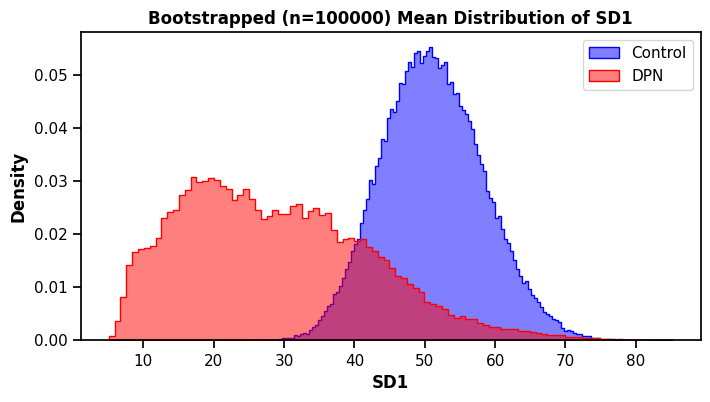

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,SD2,0.0552,55.93,18.80,92.43,9.75


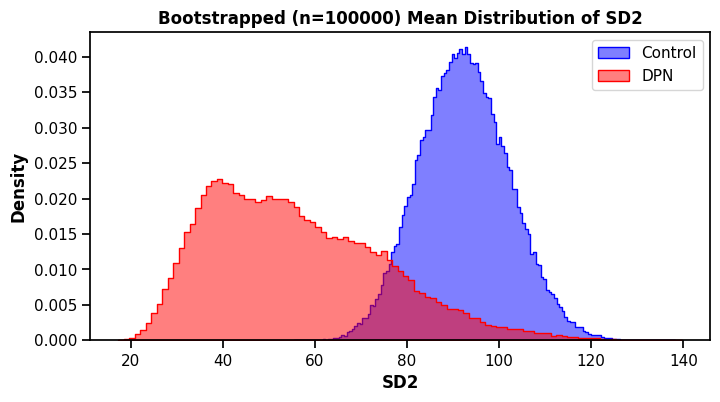

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,SD1÷SD2,0.24,0.43,0.10,0.51,0.0404


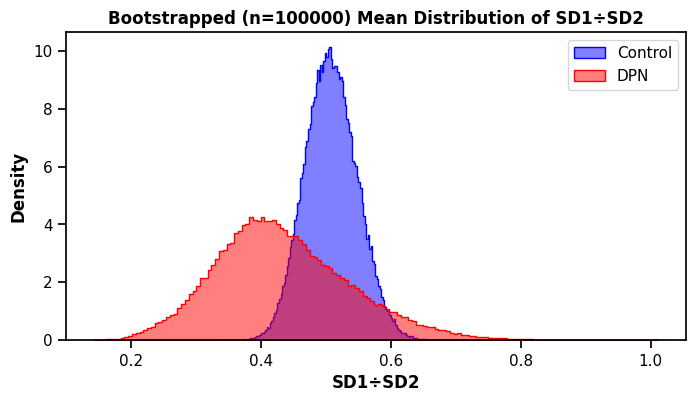

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,ApEn,0.48,0.89,0.12,0.90,0.0418


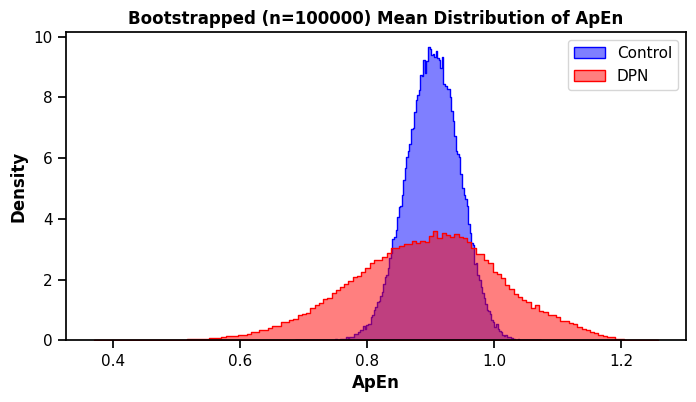

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,SampEn,0.43,1.11,0.24,1.06,0.0829


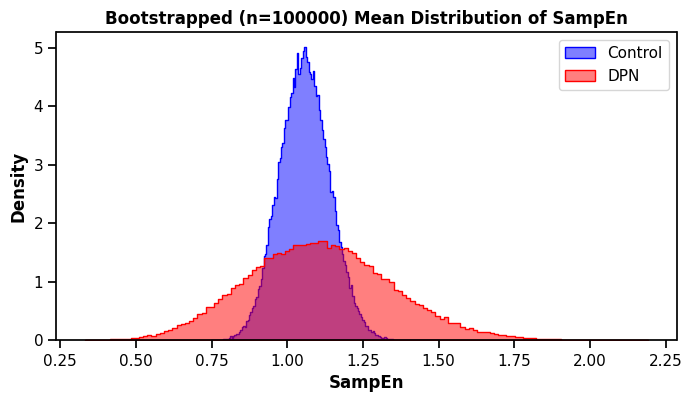

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,DFA α1,0.44,0.98,0.14,0.96,0.0505


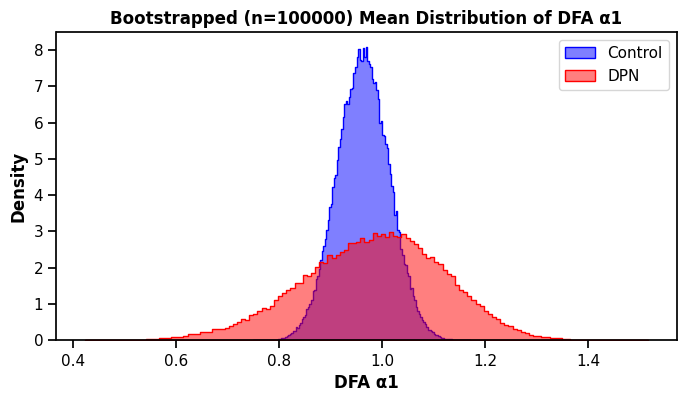

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,DFA α2,0.12,1.03,0.11,0.88,0.0446


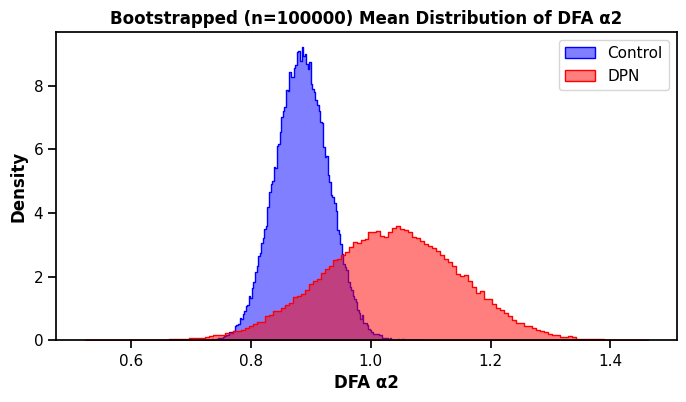

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,D2,0.00852,-3.95,0.66,-2.57,0.16


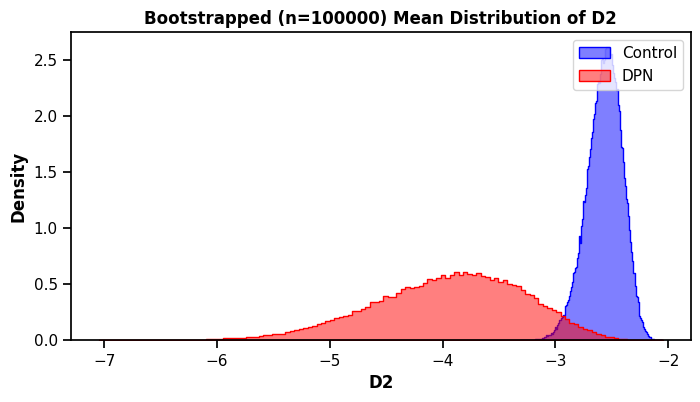

In [9]:
sampler.show_bayes_metrics(non_linear_metrics)

# Dumb classifier approach

this has yielded no good results

I have an idea that checking how suitable each value is for each population would allow me to classify the data

Construct a model that could tell how likely is each value to belong to one of the two pupulations.

Fit a gaussian model onto of each distribution.

In [10]:
from scipy.stats import norm

gaussian_dpn = {}
gaussian_controls ={}

for row in bayes_table.iterrows():
    metric = row[1]['Metric']

    dpn_mean = row[1]['DPN_Mean']
    dpn_std = row[1]['DPN_Std']
    gaussian_dpn[metric] = norm(dpn_mean, dpn_std)

    control_mean = row[1]['Control_Mean']
    control_std = row[1]['Control_Std']
    gaussian_controls[metric] = norm(control_mean, control_std)


calculate the chances of each value belonging to the distribution

In [11]:
chances = pd.DataFrame()
for row in data.iterrows():
  
    chance_dpn = {"x_"+metric: gaussian_dpn[metric].pdf(row[1][metric]) for metric in indicator_columns}

    chance_control = {"c_"+metric: gaussian_controls[metric].pdf(row[1][metric]) for metric in indicator_columns}
    
    chance_dpn = pd.Series(chance_dpn)
    chance_control = pd.Series(chance_control)

    result = {
        'DPN': row[1]['DPN'],
        'DPN_chance': chance_dpn.prod(),
        'control_chance': chance_control.prod(),
        **chance_dpn,
        **chance_control
    }


    chances = pd.concat([chances, pd.DataFrame([result])], ignore_index=True)

chances.tail()

,DPN,DPN_chance,control_chance,x_SDRR,x_RMSSD,x_pNN50 (%),x_Mean HR (bpm),x_VLF Power,x_VLF Peak Frequency,x_LF Power,...,c_LF÷HF Ratio,c_S,c_SD1,c_SD2,c_SD1÷SD2,c_ApEn,c_SampEn,c_DFA α1,c_DFA α2,c_D2
5229,True,2.72e-15,1.05e-36,0.0202,0.0211,0.10,0.0506,0.0926,73.72,0.00469,...,13.22,2.16e-06,0.000223,0.00686,0.0244,3.35,4.71,0.98,0.000111,2.26
5230,True,5.31e-110,2.24e-266,1.72e-08,2.11e-15,5.18e-05,0.026,0.0804,5.33,5.31e-23,...,6.91,1.24e-09,8.58e-29,3.91e-05,8.88e-35,9.08e-09,1.17e-07,1.82e-08,1.06e-14,3.89e-05
5231,True,2.03e-83,1.32e-210,2.6e-06,2.58e-07,0.025,0.0157,0.0487,5.46,1.21e-33,...,0.29,4.31e-06,6.81e-09,1.28e-05,0.000136,1.74e-10,4.07e-08,0.00156,7.97e-17,0.000225
5232,True,3.69e-29,7.42e-70,0.013,0.00345,0.14,0.0201,0.0928,98.48,0.00622,...,0.67,1.5e-05,0.0508,0.00429,7.49e-08,2.20,0.061,8.84e-06,2.49e-24,0.94
5233,True,3.74e-114,5.29e-256,5.84e-15,1.09e-17,0.00042,0.00962,0.0367,5.51,2.78e-05,...,0.20,7.84e-24,6.94e-35,1.09e-23,7.25e-07,1.34e-32,6.62e-17,0.0637,7.03e-06,3.65e-09


In [12]:
chances["shows_dpn"] = chances["DPN_chance"] > chances["control_chance"]

chances["true_positive"] = chances["shows_dpn"] & chances["DPN"]
chances["false_positive"] = chances["shows_dpn"] & ~chances["DPN"]
chances["true_negative"] = ~chances["shows_dpn"] & ~chances["DPN"]
chances["false_negative"] = ~chances["shows_dpn"] & chances["DPN"]


results = {
    "true_positive": chances["true_positive"].mean(),
    "true_negative": chances["true_negative"].mean(),
    "false_positive": chances["false_positive"].mean(),
    "false_negative": chances["false_negative"].mean()
}

print(results)

{'true_positive': 0.13431410011463507, 'true_negative': 0.033626289644631255, 'false_positive': 0.8320596102407337, 'false_negative': 0.0}


In [13]:
for metric in indicator_columns:
    chances[f"x_higher_{metric}"] = chances[f"x_{metric}"] > chances[f"c_{metric}"]


chances["dpn_favoring_metrics_count"] = chances[[f"x_higher_{metric}" for metric in indicator_columns]].sum(axis=1)
chances["control_favoring_metrics_count"] = len(indicator_columns) - chances["dpn_favoring_metrics_count"]


chances["dpn_favor_percentage"] = chances["dpn_favoring_metrics_count"] / len(indicator_columns) * 100
chances["control_favor_percentage"] = chances["control_favoring_metrics_count"] / len(indicator_columns) * 100

metric_counts = {
    "avg_dpn_favoring_metrics": chances["dpn_favoring_metrics_count"].mean(),
    "avg_control_favoring_metrics": chances["control_favoring_metrics_count"].mean(),
    "avg_dpn_favor_percentage": chances["dpn_favor_percentage"].mean(),
    "avg_control_favor_percentage": chances["control_favor_percentage"].mean()
}

print("Average metrics per patient:")
for key, value in metric_counts.items():
    print(f"{key}: {value:.2f}")


print("\nAverage for actual DPN patients:")
print(f"dpn_favoring_metrics: {chances[chances['DPN']]['dpn_favoring_metrics_count'].mean():.2f}")
print(f"control_favoring_metrics: {chances[chances['DPN']]['control_favoring_metrics_count'].mean():.2f}")

print("\nAverage for actual control patients:")
print(f"dpn_favoring_metrics: {chances[~chances['DPN']]['dpn_favoring_metrics_count'].mean():.2f}")
print(f"control_favoring_metrics: {chances[~chances['DPN']]['control_favoring_metrics_count'].mean():.2f}")

Average metrics per patient:
avg_dpn_favoring_metrics: 15.43
avg_control_favoring_metrics: 4.57
avg_dpn_favor_percentage: 77.14
avg_control_favor_percentage: 22.86

Average for actual DPN patients:
dpn_favoring_metrics: 17.40
control_favoring_metrics: 2.60

Average for actual control patients:
dpn_favoring_metrics: 15.12
control_favoring_metrics: 4.88
